### Proyek Analisis Data: E-Commerce Public Dataset
- **Nama**: Rizkia Lucyani Suherman
- **Email**: rizkialucyani25@gmail.com
- **ID Dicoding**: Rizkia Lucyani Suherman


## Menentukan Pertanyaan Bisnis

1. Which product is the most popular and which one is the least purchased?
2. How do customers rate their satisfaction with the service?
3. Which city has the most sellers and buyers?
4. What payment method is used for the largest transaction? What is the total value of that transaction?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.ticker as mtick

## Data Wrangling

### Gathering Data

In [3]:
customer_df = pd.read_csv('customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_df = pd.read_csv('geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [14]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
product_category_name_df = pd.read_csv('product_category_name_translation.csv')
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [15]:
import pandas as pd
from IPython.core.display import display, HTML

products_df = pd.read_csv('products_dataset.csv')

html = products_df.head().to_html()
html = html.replace('<table', '<table style="color: pink;"')
display(HTML(html))

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
import pandas as pd
from IPython.core.display import display, HTML

sellers_df = pd.read_csv('sellers_dataset.csv')

html = sellers_df.head().to_html()
html = html.replace('<table', '<table style="color: orange;"')
display(HTML(html))


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Menilai tabel pada **customers_df**

In [17]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [18]:
customer_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [19]:
import pandas as pd
from IPython.core.display import display, HTML

jumlah_duplikasi = customer_df.duplicated().sum()

display(HTML(f'<span style="color: blue;">Jumlah duplikasi: {jumlah_duplikasi}</span>'))


In [20]:
import pandas as pd
from IPython.core.display import display, HTML

deskripsi = customer_df.describe()

html = deskripsi.to_html()
html = html.replace('<table', '<table style="color: lightblue;"')
display(HTML(html))


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Menilai tabel pada **geolocation_df**

In [21]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  226278 non-null  int64  
 1   geolocation_lat              226278 non-null  float64
 2   geolocation_lng              226277 non-null  float64
 3   geolocation_city             226277 non-null  object 
 4   geolocation_state            226277 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 8.6+ MB


In [22]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,1
geolocation_city,1
geolocation_state,1


In [23]:
print('Jumlah duplikasi: ', geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  80379


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,226278.000000,226278.000000,226277.000000
mean,5081.991135,-23.559733,-46.633821
std,2188.256692,0.081739,0.146722
min,1001.000000,-24.006049,-48.889161
25%,3410.000000,-23.610881,-46.728073
50%,4950.000000,-23.554969,-46.650761
75%,6703.000000,-23.508094,-46.544662
max,9391.000000,-20.543092,-45.826581


Menilai tabel pada **order_items_df**

In [24]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [25]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [26]:
print('Jumlah duplikasi: ', order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Menilai tabel pada **order_payments_df**

In [27]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [28]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [29]:
print('Jumlah duplikasi: ', order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Menilai tabel pada **order_reviews_df**

In [30]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [31]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [32]:
print('Jumlah duplikasi: ', order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Menilai tabel pada **orders_df**

In [33]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [34]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [35]:
print('Jumlah duplikasi: ', orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Menilai tabel pada **products_df**

In [36]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [37]:
import pandas as pd

missing_values_df = products_df.isna().sum().reset_index()
missing_values_df.columns = ['Column', 'Missing Values']
styled_missing_table = missing_values_df.style.set_table_attributes('style="background-color: pink;"')
styled_missing_table


,Column,Missing Values
0,product_id,0
1,product_category_name,610
2,product_name_lenght,610
3,product_description_lenght,610
4,product_photos_qty,610
5,product_weight_g,2
6,product_length_cm,2
7,product_height_cm,2
8,product_width_cm,2


In [38]:
import pandas as pd

duplicate_count = products_df.duplicated().sum()
print('Jumlah duplikasi: ', duplicate_count)
description_df = products_df.describe().reset_index()
styled_description_table = description_df.style.set_table_attributes('style="background-color: pink;"')
styled_description_table


Jumlah duplikasi:  0


,index,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
1,mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
2,std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
3,min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
4,25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
5,50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
6,75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
7,max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Menilai tabel pada **product_category_name**

In [39]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [40]:
import pandas as pd

missing_values_df = product_category_name_df.isna().sum().reset_index()
missing_values_df.columns = ['Column', 'Missing Values']
styled_missing_table = missing_values_df.style.set_table_attributes('style="background-color: lightblue;"')
styled_missing_table


,Column,Missing Values
0,product_category_name,0
1,product_category_name_english,0


In [41]:
import pandas as pd

duplicate_count = product_category_name_df.duplicated().sum()
print('Jumlah duplikasi: ', duplicate_count)
description_df = product_category_name_df.describe().reset_index()
styled_description_table = description_df.style.set_table_attributes('style="background-color: lightblue;"')
styled_description_table


Jumlah duplikasi:  0


,index,product_category_name,product_category_name_english
0,count,71,71
1,unique,71,71
2,top,beleza_saude,health_beauty
3,freq,1,1


Menilai tabel pada **sellers_df**

In [42]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [43]:
import pandas as pd
missing_values_df = sellers_df.isna().sum().reset_index()
missing_values_df.columns = ['Column', 'Missing Values']
styled_missing_table = missing_values_df.style.set_table_attributes('style="background-color: purple; color: white;"')
styled_missing_table


,Column,Missing Values
0,seller_id,0
1,seller_zip_code_prefix,0
2,seller_city,0
3,seller_state,0


In [44]:
import pandas as pd

duplicate_count = sellers_df.duplicated().sum()
print('Jumlah duplikasi: ', duplicate_count)
description_df = sellers_df.describe().reset_index()
styled_description_table = description_df.style.set_table_attributes('style="background-color: purple; color: white;"')
styled_description_table


Jumlah duplikasi:  0


,index,seller_zip_code_prefix
0,count,3095.000000
1,mean,32291.059451
2,std,32713.453830
3,min,1001.000000
4,25%,7093.500000
5,50%,14940.000000
6,75%,64552.500000
7,max,99730.000000


### Cleaning Data

Menghapus data duplikasi pada **geolocation_df**

In [45]:
geolocation_df.duplicated().sum()

80379

In [46]:

geolocation_df.drop_duplicates(inplace=True)

In [47]:
geolocation_df.duplicated().sum()

0

Mengganti tipe data menjadi datetime pada tabel order_item_df, order_review_df, dan **orders_df**

In [48]:
dt_order_item = ['shipping_limit_date']
for column in dt_order_item:
    order_items_df[column] = pd.to_datetime(order_items_df[column])

In [49]:

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [50]:
dt_order_review = ['review_creation_date', 'review_answer_timestamp']
for column in dt_order_review:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [51]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [52]:
dt_orders = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for column in dt_orders:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [53]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB



Mengisi missing values pada tabel order_review_df, product_df, & **orders_df**

In [54]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0



Mengisi missing value dengan nilai defaul "No Title" & "No Message"

In [55]:
order_reviews_df['review_comment_title'].fillna("No Title", inplace=True)
order_reviews_df['review_comment_message'].fillna("No Message", inplace=True)

In [56]:
import pandas as pd

missing_values_df = order_reviews_df.isna().sum().reset_index()
missing_values_df.columns = ['Column', 'Missing Values']
styled_missing_table = missing_values_df.style.set_table_attributes('style="background-color: pink;"')
styled_missing_table


,Column,Missing Values
0,review_id,0
1,order_id,0
2,review_score,0
3,review_comment_title,0
4,review_comment_message,0
5,review_creation_date,0
6,review_answer_timestamp,0


In [57]:
import pandas as pd

missing_values_df = products_df.isna().sum().reset_index()
missing_values_df.columns = ['Column', 'Missing Values']
styled_missing_table = missing_values_df.style.set_table_attributes('style="background-color: pink;"')
styled_missing_table


,Column,Missing Values
0,product_id,0
1,product_category_name,610
2,product_name_lenght,610
3,product_description_lenght,610
4,product_photos_qty,610
5,product_weight_g,2
6,product_length_cm,2
7,product_height_cm,2
8,product_width_cm,2


Filling the missing values with "Others" for the product_category_name column and filling the remaining columns with the median of each respective column that contains missing values.

In [58]:
products_df['product_category_name'].fillna('Others', inplace=True)

In [59]:
numeric_columns = products_df.select_dtypes(include=[np.number])
products_df[numeric_columns.columns] = products_df[numeric_columns.columns].fillna(numeric_columns.median())

In [60]:

products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [61]:
import pandas as pd

missing_values_df = orders_df.isna().sum().reset_index()
missing_values_df.columns = ['Column', 'Missing Values']
styled_missing_table = missing_values_df.style.set_table_attributes('style="background-color: pink;"')
styled_missing_table


,Column,Missing Values
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0
4,order_approved_at,160
5,order_delivered_carrier_date,1783
6,order_delivered_customer_date,2965
7,order_estimated_delivery_date,0


Filling the missing values in orders_df using the forward fill (ffill()) method.

In [62]:
orders_df.ffill(inplace=True)

In [63]:
import pandas as pd

missing_values_df = orders_df.isna().sum().reset_index()
missing_values_df.columns = ['Column', 'Missing Values']
styled_missing_table = missing_values_df.style.set_table_attributes('style="background-color: pink;"')
styled_missing_table


,Column,Missing Values
0,order_id,0
1,customer_id,0
2,order_status,0
3,order_purchase_timestamp,0
4,order_approved_at,0
5,order_delivered_carrier_date,0
6,order_delivered_customer_date,0
7,order_estimated_delivery_date,0


## Exploratory Data Analysis (EDA)

Exploring the customers_df table.

In [64]:
import pandas as pd

description_df = customer_df.describe(include='all').reset_index()
styled_description_table = description_df.style.set_table_attributes('style="background-color: lightblue;"')
styled_description_table


,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,count,99441,99441,99441.000000,99441,99441
1,unique,99441,96096,nan,4119,27
2,top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,nan,sao paulo,SP
3,freq,1,17,nan,15540,41746
4,mean,nan,nan,35137.474583,nan,nan
5,std,nan,nan,29797.938996,nan,nan
6,min,nan,nan,1003.000000,nan,nan
7,25%,nan,nan,11347.000000,nan,nan
8,50%,nan,nan,24416.000000,nan,nan
9,75%,nan,nan,58900.000000,nan,nan


Determining that the customer_df table contains unique values.

In [65]:
customer_df.customer_id.is_unique

True

Identifying the city from which the most customers originate.

In [66]:
import pandas as pd
unique_customers_df = customer_df.groupby(by='customer_city')['customer_id'].nunique().reset_index()
unique_customers_df = unique_customers_df.sort_values(by='customer_id', ascending=False)
styled_unique_customers_table = unique_customers_df.style.set_table_attributes('style="background-color: lightgreen;"')
styled_unique_customers_table


,customer_city,customer_id
3597,sao paulo,15540
3155,rio de janeiro,6882
453,belo horizonte,2773
558,brasilia,2131
1143,curitiba,1521
707,campinas,1444
2964,porto alegre,1379
3247,salvador,1245
1529,guarulhos,1189
3428,sao bernardo do campo,938


Exploring the order_payment_df table

In [67]:
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


Identifying the most common payment methods.

In [68]:
order_payments_df.groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [69]:
order_payments_df.sort_values(by='payment_value', ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66
...,...,...,...,...,...
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00


### Explore All data

Merging the customer_df and orders_df tables.

In [70]:
customer_orders_df = pd.merge(
    left=customer_df,
    right=orders_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
customer_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


Merging the products_df and product_category_name_df tables.

In [71]:
new_products_df = pd.merge(
    left=products_df,
    right=product_category_name_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

In [72]:
column = new_products_df.pop('product_category_name_english')
new_products_df.insert(2, column.name, column)
new_products_df.head()

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Combine the customer_order_df and order_payment_df tables.

In [73]:
merge1 = pd.merge(
    left=customer_orders_df,
    right=order_payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


Merge all the tables

In [74]:
merge2 = pd.merge(
    left=merge1,
    right=order_items_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [75]:
merge3 = pd.merge(
    left=merge2,
    right=new_products_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
merge3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [76]:
merge4 = pd.merge(
    left=merge3,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
merge4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP


In [77]:
all_df = pd.merge(
    left=merge4,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


In [78]:
all_df.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_installments,payment_value,order_item_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score,review_creation_date,review_answer_timestamp
count,119143.000000,119143,119143,119143,119143,119143,119140.000000,119140.000000,119140.000000,118310.000000,...,118310.000000,118310.000000,118310.000000,118310.000000,118310.000000,118310.000000,118310.000000,118146.000000,118146,118146
mean,35033.451298,2017-12-29 18:36:13.115760384,2017-12-30 06:27:12.319137280,2018-01-03 11:58:02.865640192,2018-01-12 22:14:45.654994432,2018-01-22 15:21:10.241642496,1.094737,2.941246,172.735135,1.196543,...,783.209272,2.187753,2112.012002,30.264255,16.619094,23.074279,24442.410413,4.015582,2018-01-11 13:17:50.103092736,2018-01-14 17:00:35.769302528
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,0.000000,0.000000,1.000000,...,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,11250.000000,2017-09-10 20:15:46,2017-09-11 17:44:36,2017-09-14 20:32:23.500000,2017-09-22 21:27:06,2017-10-02 00:00:00,1.000000,1.000000,60.850000,1.000000,...,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000,2017-09-22 00:00:00,2017-09-25 11:15:40.750000128
50%,24240.000000,2018-01-17 11:59:12,2018-01-17 17:50:50,2018-01-23 18:51:42,2018-02-01 13:28:46,2018-02-14 00:00:00,1.000000,2.000000,108.160000,1.000000,...,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,5.000000,2018-02-01 00:00:00,2018-02-03 12:04:23
75%,58475.000000,2018-05-03 13:18:30,2018-05-03 17:23:18,2018-05-07 15:09:00,2018-05-15 11:33:58,2018-05-25 00:00:00,1.000000,4.000000,189.240000,1.000000,...,977.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,5.000000,2018-05-15 00:00:00,2018-05-17 10:48:59
max,99990.000000,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,29.000000,24.000000,13664.080000,21.000000,...,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,29823.198969,NaN,NaN,NaN,NaN,NaN,0.730141,2.777848,267.776077,0.699489,...,648.254189,1.711055,3786.419544,16.188144,13.452529,11.748214,27573.004511,1.400436,NaN,NaN


Display the total profit by state for each product category

In [85]:

all_df.groupby(by=['customer_state', 'product_category_name_english']).agg({
    'price' : 'sum',
}).sort_values(by='price', ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 509313.30
               health_beauty                  475928.29
               watches_gifts                  450822.51
               sports_leisure                 403732.12
               computers_accessories          360210.34
...                                                 ...
AL             drinks                             15.49
BA             home_comfort_2                     12.90
ES             home_comfort_2                     12.90
PR             home_comfort_2                     12.90
MS             costruction_tools_tools             6.80

[1356 rows x 1 columns]

Analyzing customer satisfaction levels

In [79]:
all_df.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(by='review_score', ascending=False)

,review_score,customer_id
4,5.0,66343
3,4.0,22319
2,3.0,9894
1,2.0,4162
0,1.0,15428


**RFM**

In [80]:
today=dt.datetime(2018,10,20)

In [86]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Group by 'customer_id' and calculate Recency, Frequency, and Monetary
recency = (today - all_df.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_df.groupby('customer_id')['order_id'].count()
monetary = all_df.groupby('customer_id')['price'].sum()

# Create a new DataFrame with the calculated metrics
rfm_df = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

In [87]:
column_list = ['customer_id','Recency','Frequency','Monetary']
rfm_df.columns = column_list

Customer with the highest spending

In [88]:
rfm_df.sort_values(by='Monetary', ascending=False)

,customer_id,Recency,Frequency,Monetary
8546,1617b1357756262bfa56ab541c47bc16,385,8,13440.00
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
86603,de832e8dbb1f588a47013e53feaa67cc,508,15,10856.10
38590,63b964e79dee32a3587651701a2b8dbf,247,24,9888.00
43009,6f241d5bbb142b6f764387c8c270645a,162,7,9520.14
...,...,...,...,...
70386,b4bade0909a2956cbeef036f6fd7b95e,274,1,0.00
33389,5645f6b97d3740bc2846f27af1fe973f,218,1,0.00
70474,b4f3d737d8ec2ad8a4e85fc6e578a4fc,434,1,0.00
33344,56252fddbb6af46b87f5a070d68afd95,166,1,0.00


The customer with the most recent purchase

In [89]:
rfm_df.sort_values(by='Recency', ascending=False)

,customer_id,Recency,Frequency,Monetary
3354,08c5351a6aca1c1589a38f244edeee9d,775,2,72.89
40289,683c54fc24d40ee9f8a6fc179fd9856c,774,1,59.50
38013,622e13439d6b5a0b486c435618b2679e,766,1,0.00
52277,86dc2ffce2dfff336de2f386a786e574,764,3,134.97
68946,b106b360fe2ef8849fbbd056f777b4d5,747,1,100.00
...,...,...,...,...
15595,2823ffda607a2316375088e0d00005ec,20,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,18,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,16,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,3,1,0.00


The customer with the highest spending

In [90]:
rfm_df.sort_values(by='Frequency', ascending=False)

,customer_id,Recency,Frequency,Monetary
15183,270c23a11d024a44c896d1894b261a83,437,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,391,38,3039.62
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,499,26,1299.74
81894,d22f25a9fadfb1abbc2e29395b1239f4,160,24,359.76
...,...,...,...,...
35433,5b9d5dfe6b754261741fb68772efed93,258,1,22.99
35432,5b99d2ac45d9e913fa37e13a7e73f1fc,458,1,59.90
35431,5b985c8b77fba94494956d5f1e717933,164,1,120.00
35429,5b97e86cf344fc8159321fe9a84dbef9,537,1,139.90


In [91]:
all_df.to_csv('all_data.csv', index=False)

In [92]:
# prompt: buatlah coding yang mendownload all_data.csv

from google.colab import files

files.download('all_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Visualization & Explanatory Analysis

### Pertanyaan 1: Which product is the most popular and which one is the least purchased?

In [ ]:
product_counts = all_df.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_df = product_counts.sort_values(by='product_id', ascending=False)
sorted_df

,product_category_name_english,product_id
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


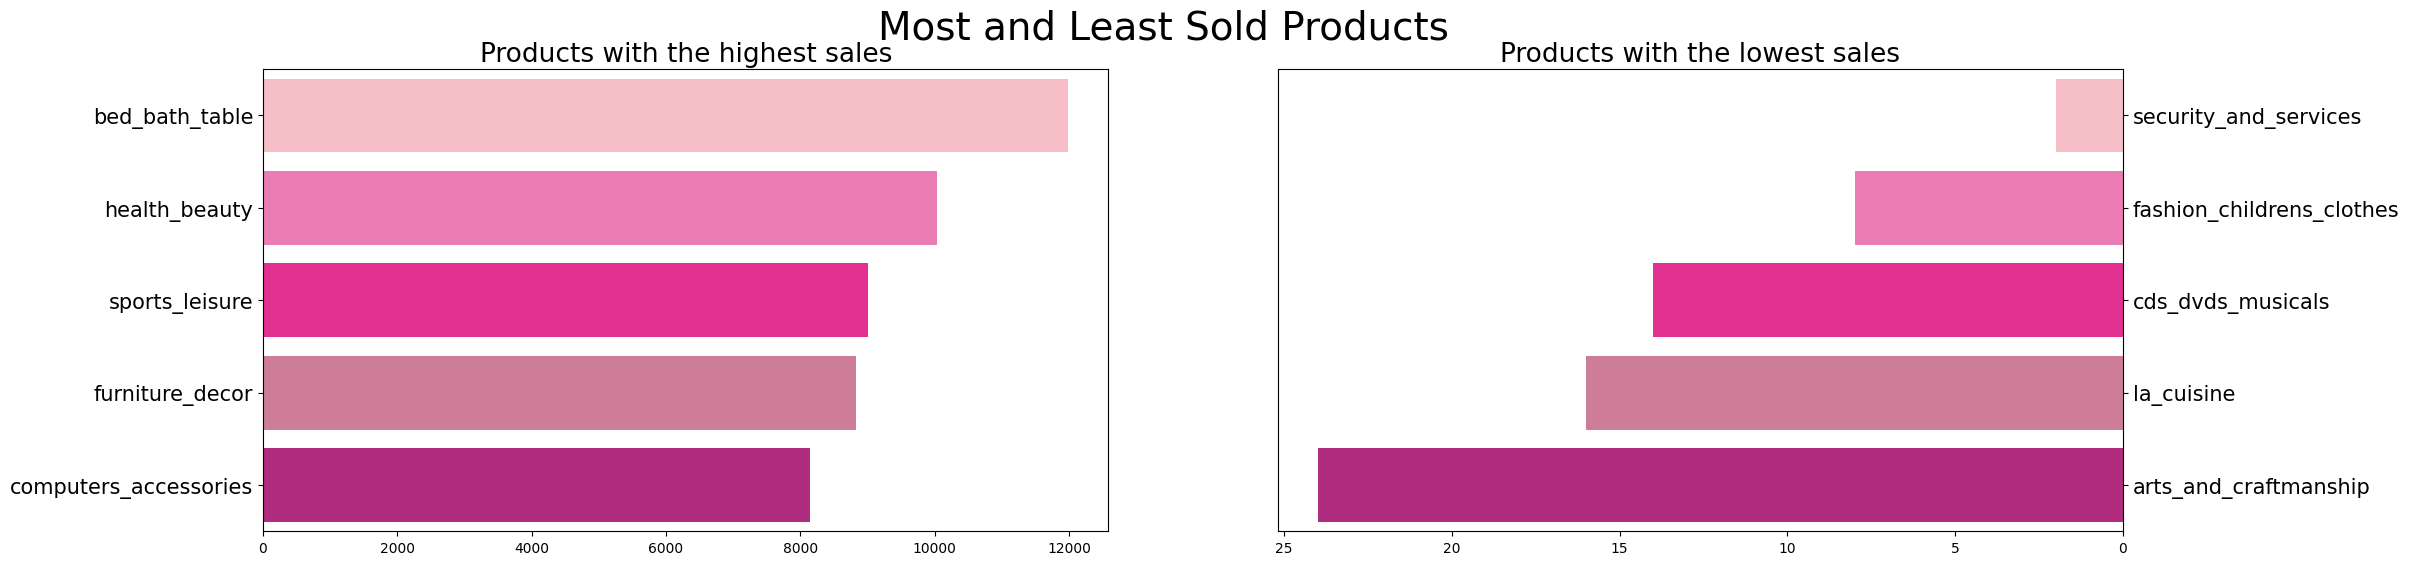

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#FFB6C1", "#FF69B4", "#FF1493", "#DB7093", "#C71585"]

sns.barplot(x="product_id", y="product_category_name_english", hue="product_category_name_english",
            data=sorted_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Products with the highest sales", loc="center", fontsize=19)
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english", hue="product_category_name_english",
            data=sorted_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Products with the lowest sales", loc="center", fontsize=19)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Most and Least Sold Products", fontsize=28)

plt.show()


### Pertanyaan 2: How do customers rate their satisfaction with the service?

<ipython-input-86-f1d4bd6ab4f2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_service.index,


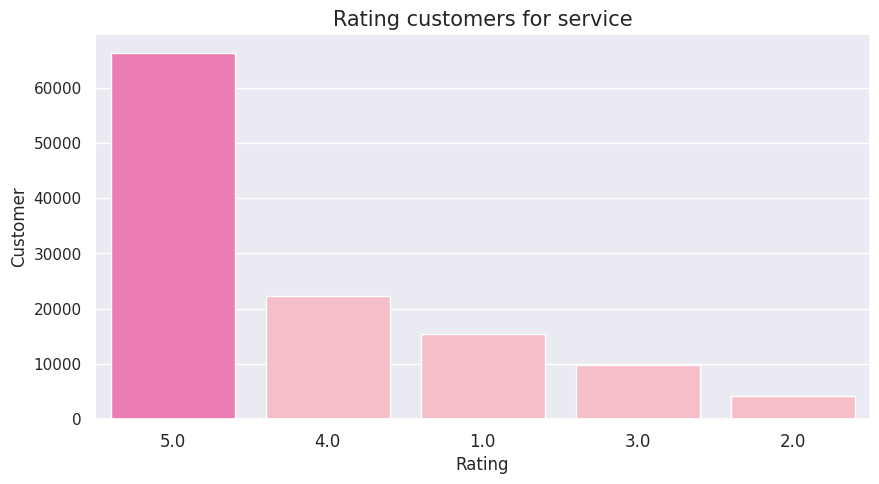

In [ ]:
rating_service = all_df['review_score'].value_counts().sort_values(ascending=False)
max_score = rating_service.idxmax()

colors = ["#FF69B4" if score == max_score else "#FFB6C1" for score in rating_service.index]

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=rating_service.index,
            y=rating_service.values,
            order=rating_service.index,
            palette=colors)

plt.title("Rating customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)

plt.show()


### Pertanyaan 3: Which city has the most sellers and buyers?

In [ ]:
import pandas as pd
import numpy as np

city_customer = all_df.customer_city.value_counts().sort_values(ascending=False).rename_axis('City').reset_index(name='Number of Customers')

def highlight_max(s):
    return ['background-color: #FFB6C1' for _ in s]  # Light pink color for all cells

styled_table = city_customer.style.apply(highlight_max, subset=['City', 'Number of Customers'])
styled_table


,City,Number of Customers
0,sao paulo,18875
1,rio de janeiro,8311
2,belo horizonte,3299
3,brasilia,2500
4,curitiba,1827
5,campinas,1757
6,porto alegre,1675
7,salvador,1544
8,guarulhos,1415
9,sao bernardo do campo,1131


<ipython-input-88-95ca2b6a169a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Number of Customers", y="City", data=top_5_cities_customer, palette=colors, legend=False)


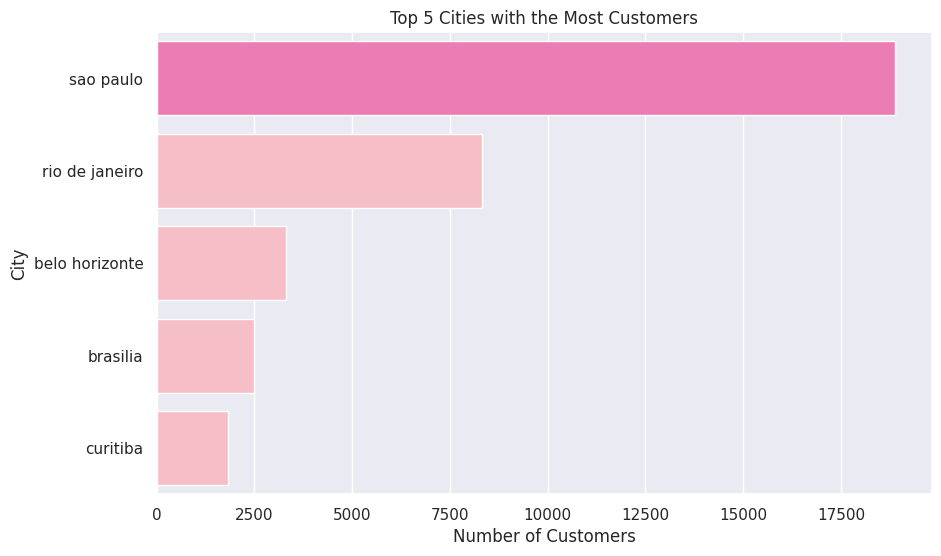

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5_cities_customer = city_customer.head(5)

plt.figure(figsize=(10, 6))

colors = ["#FF69B4" if city == top_5_cities_customer['City'].iloc[0] else "#FFB6C1" for city in top_5_cities_customer['City']]

sns.barplot(x="Number of Customers", y="City", data=top_5_cities_customer, palette=colors, legend=False)

plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.title('Top 5 Cities with the Most Customers')

plt.show()


### Pertanyaan 4: What payment method is used for the largest transaction? What is the total value of that transaction?

In [ ]:
total_payment_type = all_df.groupby('payment_type')['payment_value'].sum().reset_index()
total_payment_type

,payment_type,payment_value
0,boleto,4110920.74
1,credit_card,15775450.54
2,debit_card,257374.89
3,not_defined,0.00
4,voucher,435917.84


<ipython-input-90-260207628d6e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_type", y="payment_value_million", data=total_payment_type, palette=pink_palette)


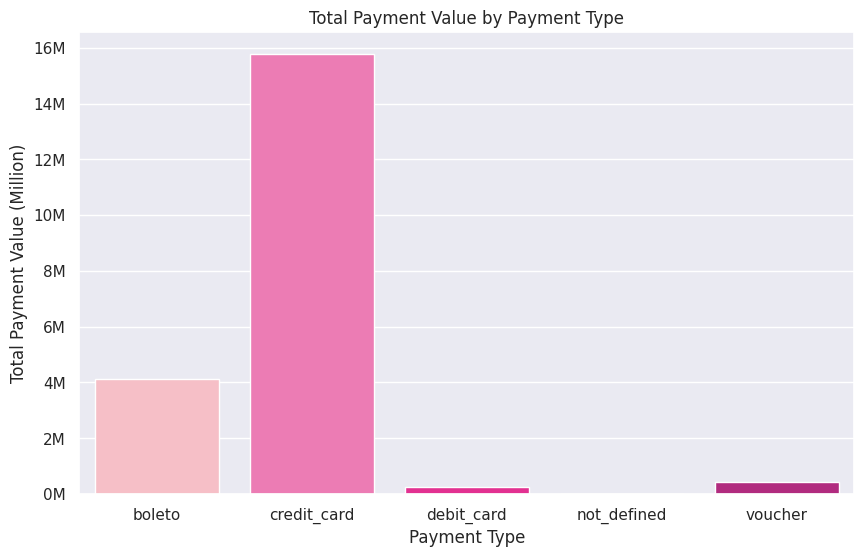

In [ ]:
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt

total_payment_type['payment_value_million'] = total_payment_type['payment_value'] / 1e6

plt.figure(figsize=(10, 6))

pink_palette = ["#FFB6C1", "#FF69B4", "#FF1493", "#DB7093", "#C71585"]
sns.barplot(x="payment_type", y="payment_value_million", data=total_payment_type, palette=pink_palette)

plt.xlabel('Payment Type')
plt.ylabel('Total Payment Value (Million)')
plt.title('Total Payment Value by Payment Type')

fmt = '{x:,.0f}M'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

plt.show()


Visualization for RFM Analysis

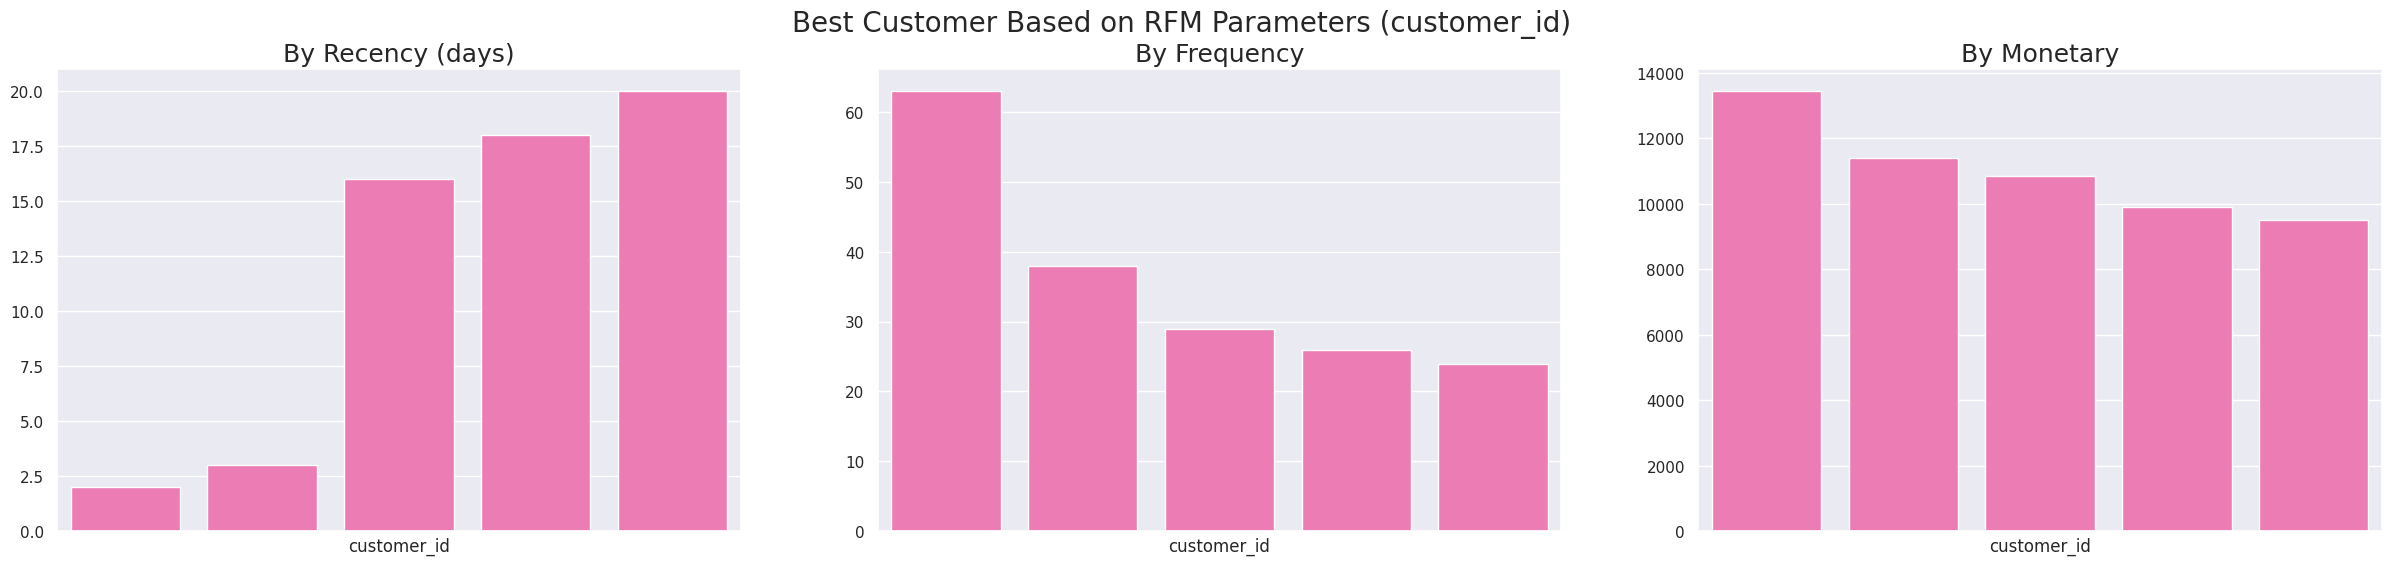

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#FF69B4", "#FF69B4", "#FF69B4", "#FF69B4", "#FF69B4"]  # Use pink color

sns.barplot(y="Recency", x="customer_id", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), ax=ax[0], color=colors[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticks([])

sns.barplot(y="Frequency", x="customer_id", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), ax=ax[1], color=colors[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('customer_id')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticks([])

sns.barplot(y="Monetary", x="customer_id", data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), ax=ax[2], color=colors[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('customer_id')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticks([])

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


## Conclusion

1. Which product is the most popular and which one is the least purchased?
The visualized data clearly indicates that the most purchased product is the bed_bath_table, while the least purchased product is security_and_services.

2. How do customers rate their satisfaction with the service?
The majority of customers express a very high level of satisfaction, as evidenced by the visualized data. Most customers awarded the highest rating of 5 in their evaluations of the services or products. In other words, a significant number of customers feel extremely satisfied with the services or products provided, which is reflected in the high ratings they assigned.

3. Which city has the most sellers and buyers?
According to the visualized data, the city with the highest number of customers is Sao Paulo, with a total of 18,875 customers. It is followed by Rio de Janeiro, Belo Horizonte, Brasília, and Curitiba in that order. In terms of sellers, Sao Paulo also leads with a total of 29,293 sellers, followed by Ibiporã, Curitiba, Santo André, and São José do Rio Preto.

4. What payment method is used for the largest transaction? What is the total value of that transaction?
The visual data shows that the payment method most frequently used for the largest transactions is boleto, with a total payment value of 4,110,920.74. Following this, the credit card payment method comes next, with a total value of 15,775,450.54, and lastly, the debit card method, which has a total payment value of 257,374.89.

